<a href="https://colab.research.google.com/github/Zinwaiyan274/Ace-assignment/blob/main/Q1.ingredients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question **2**


*   ingredients data


In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
i = pd.read_csv("https://raw.githubusercontent.com/Zinwaiyan274/Ace-assignment/main/data/ingredient.csv") 
#  let's call ingredient data as "i"
i.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [94]:
i.isnull().any() # null values checking

a               False
b               False
c               False
d               False
e               False
f               False
g               False
h               False
i               False
predictions1    False
predictions2    False
dtype: bool

In [61]:
i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


* All the features are in numerical formet.
* There is no missing values.





In [62]:
i.corr(method='pearson', min_periods=1)

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


In [63]:
i.describe() #Summary Statistic 

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


* Mean and median are quite close to eache other.
* Not variance that much except for two columns c and g.

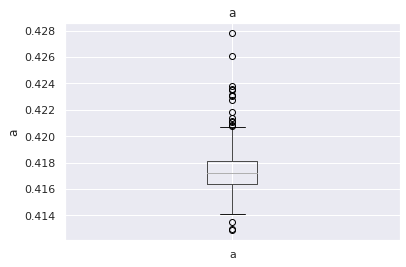

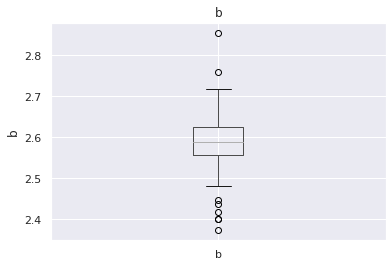

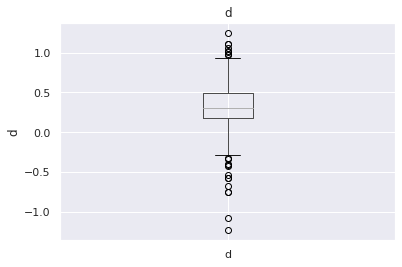

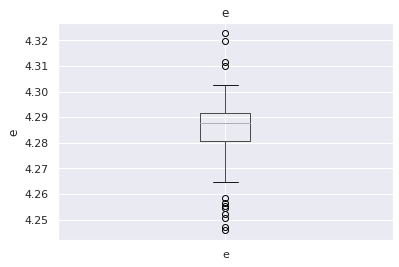

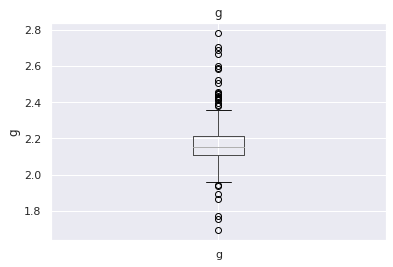

In [37]:
# let's visualise outliers as boxplots
num_vars = [var for var in i.columns if i[var].dtypes != 'O']
def find_outliers(i, var):
    df = i.copy()
    
    if 0 in i[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()
    
for var in num_vars:
     find_outliers(i, var)

So, We are totally fine there are no such outliners

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


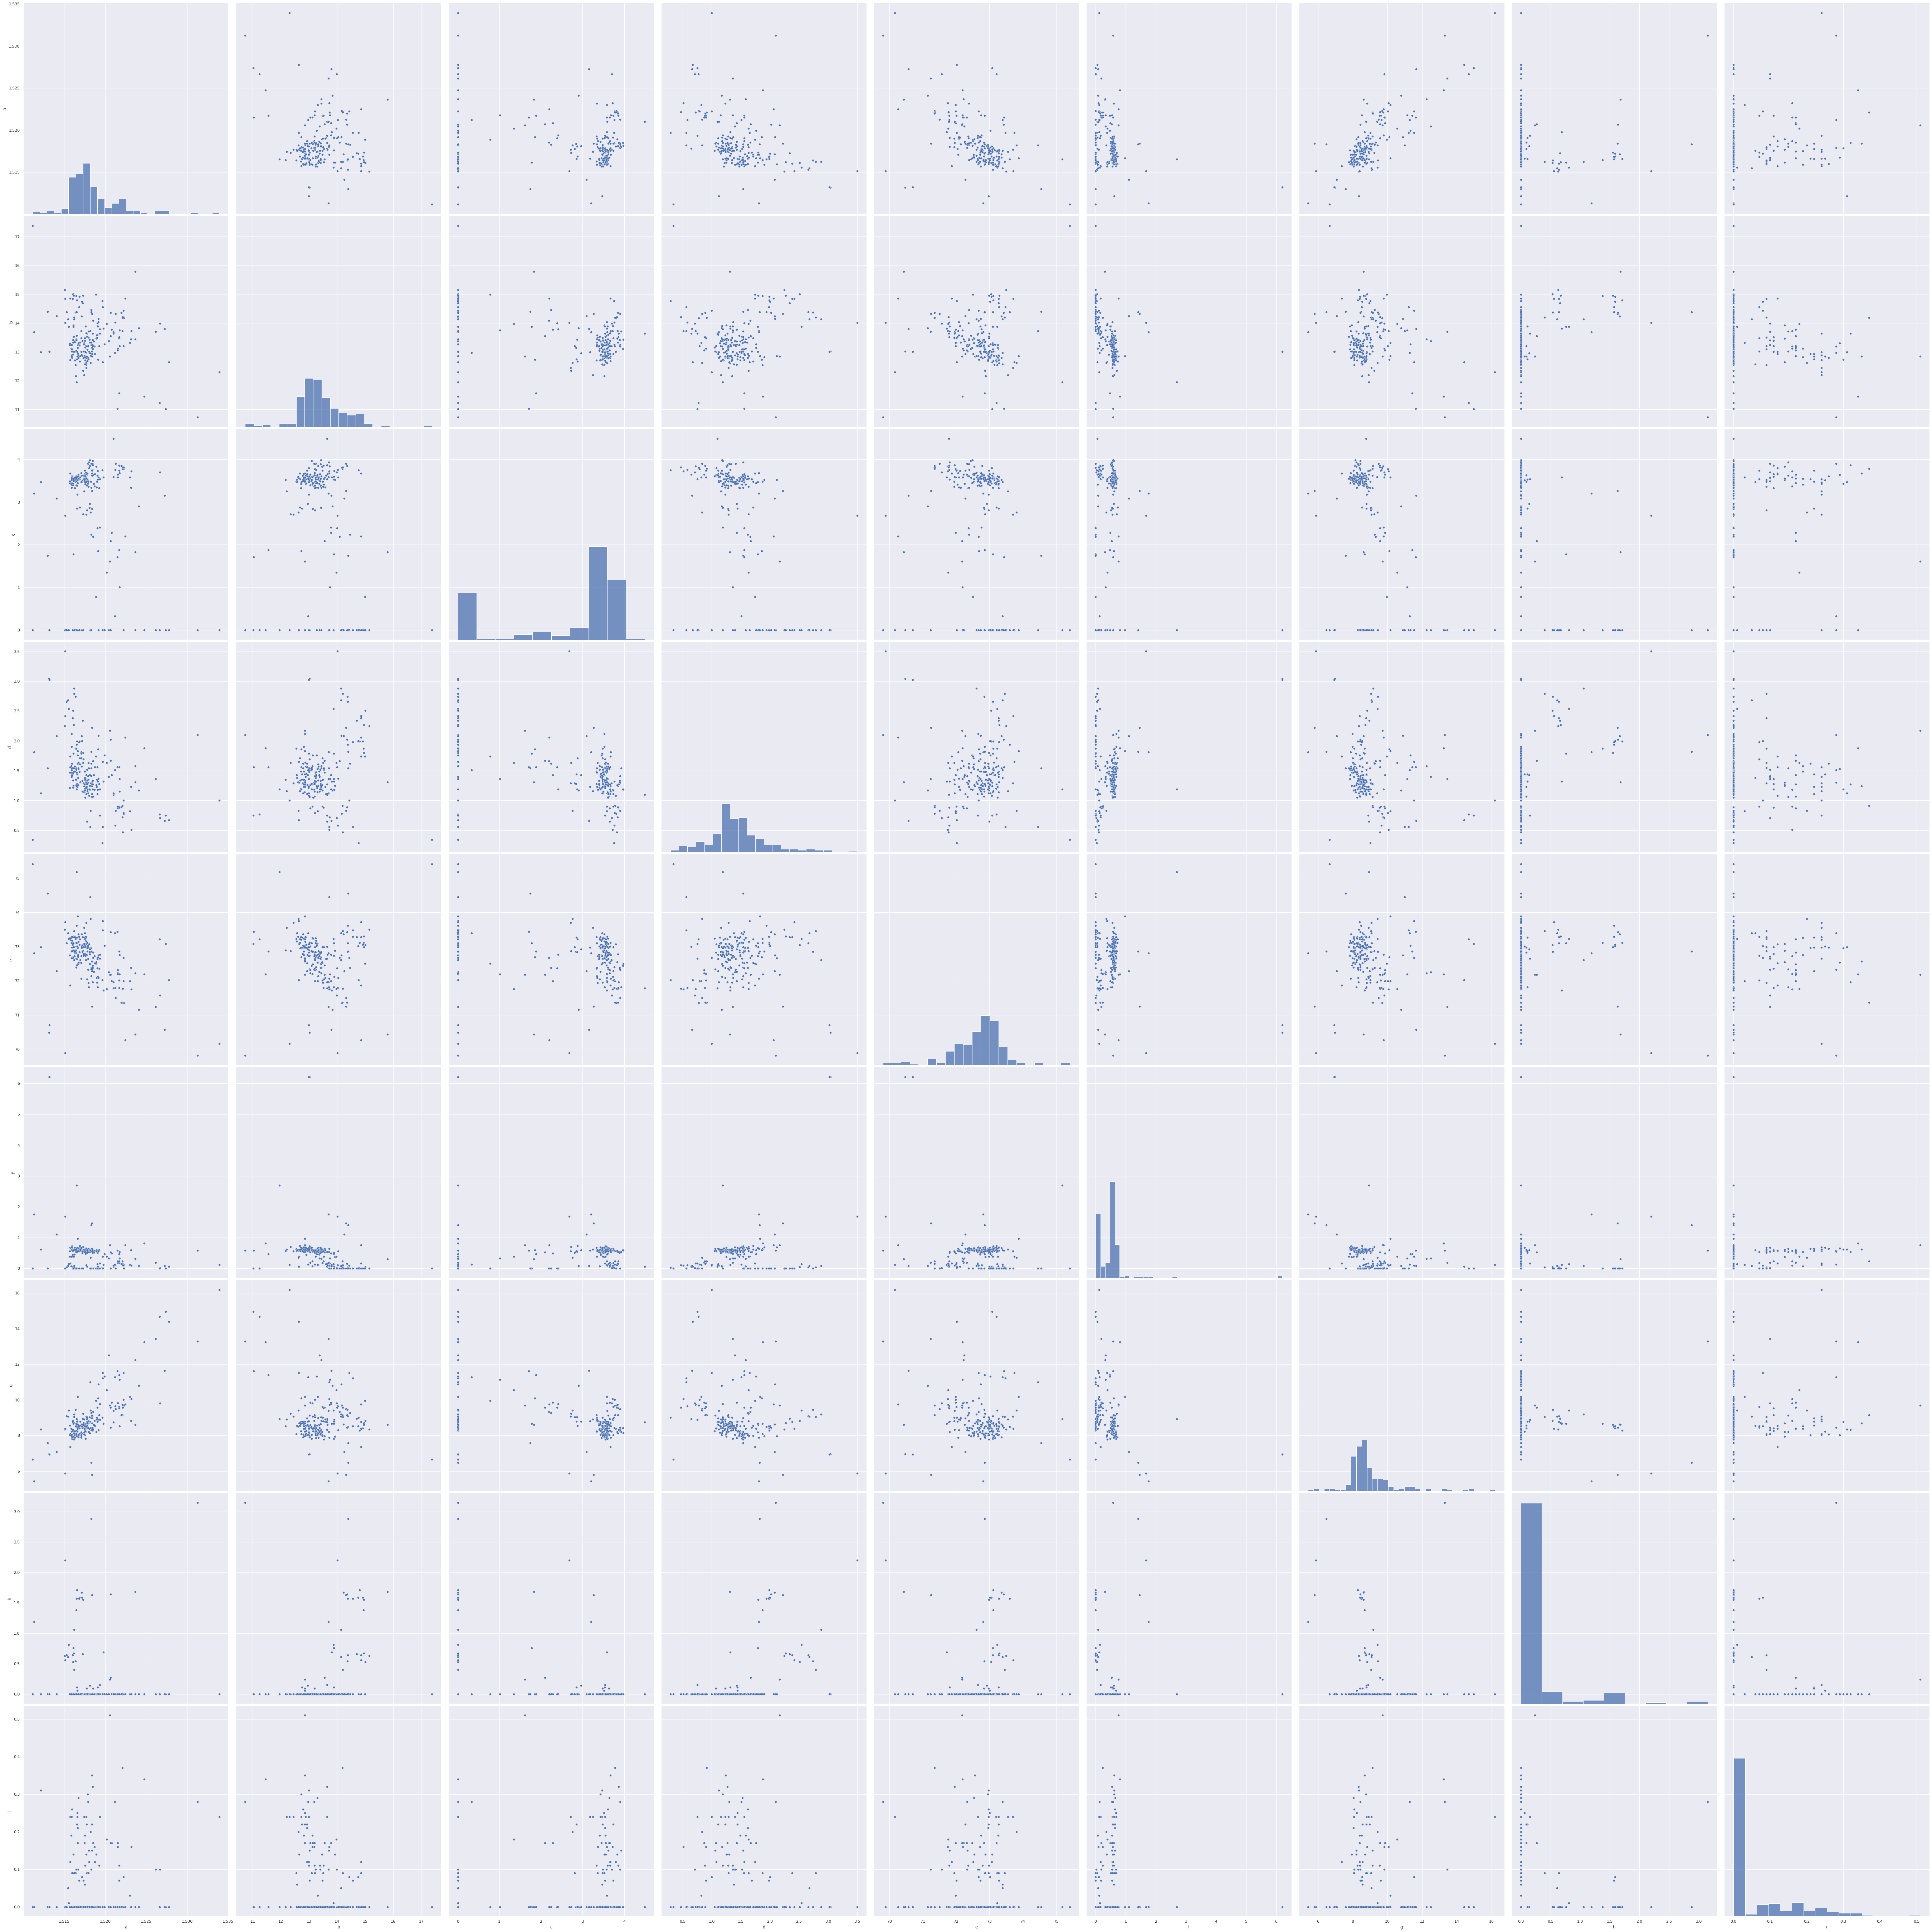

In [64]:
def plotScatterMatrix(i, plotSize, textSize):
    df = i.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='right', va='baseline', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
sns.set()
cols = i.columns
sns.pairplot(i[cols], size = 8.5)
plt.show()
# Distribution Scatter and density plots

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


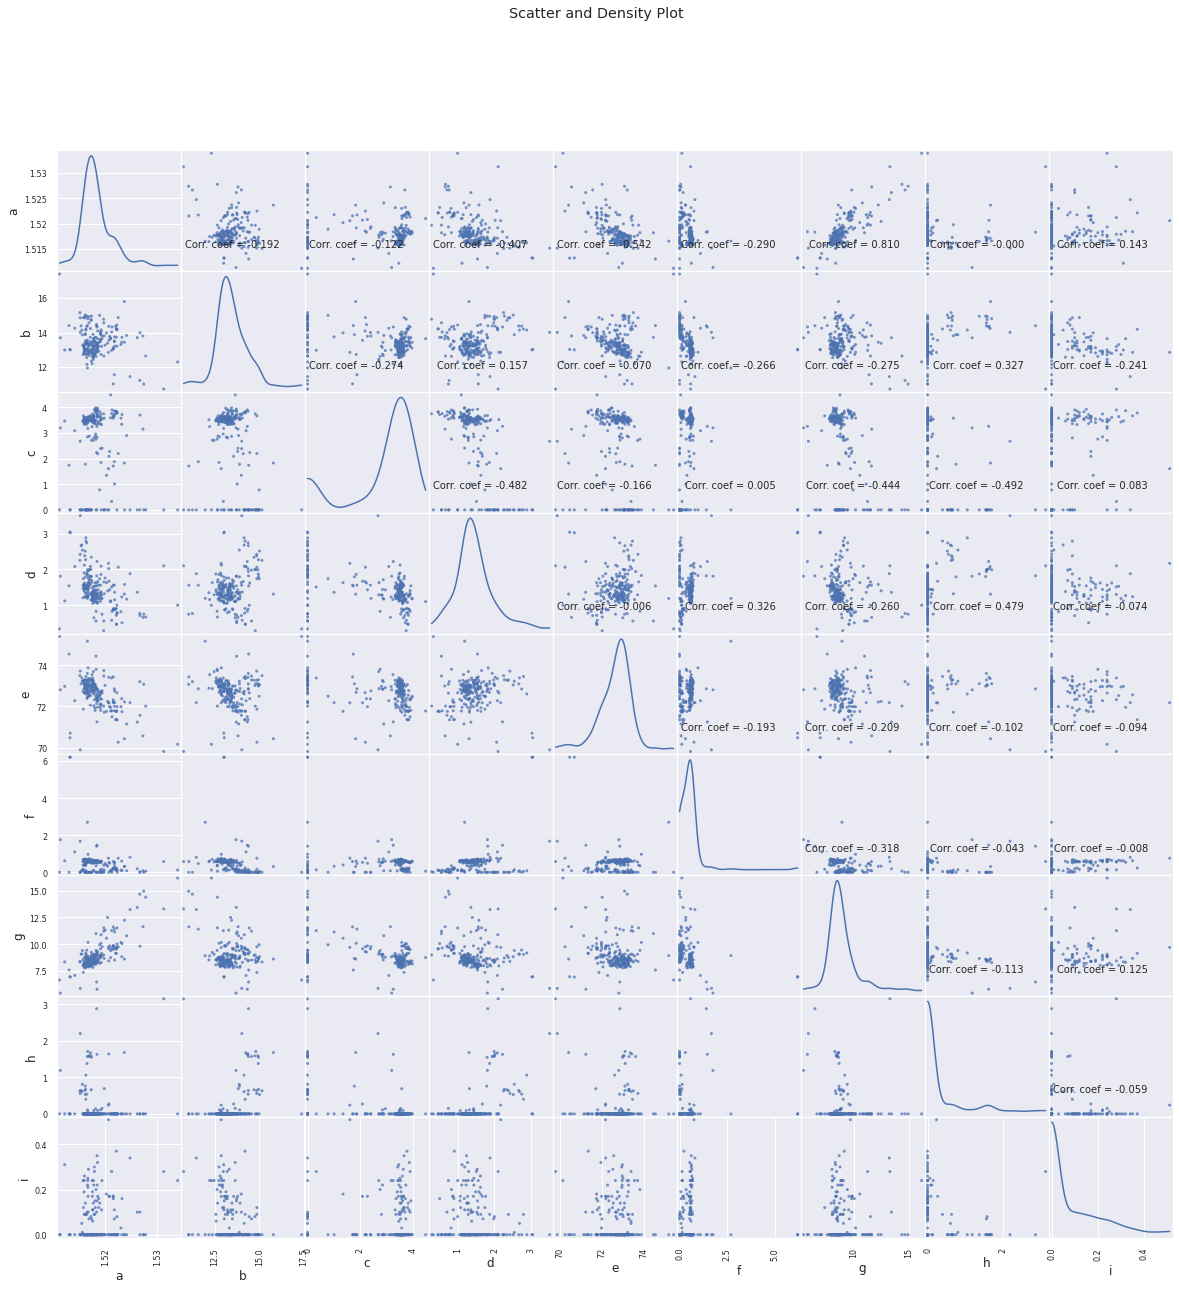

In [36]:
plotScatterMatrix(i, 20, 10)



# **Answer 2.1 - correlation**

There are few methods to calculate correlation in statistics 

*   Pearson
*   Kendall
*   Spearman 

We gonna explore all of them. Here we go!!. Let's check it out.












In [65]:
i.corr(method='kendall', min_periods=1)

,a,b,c,d,e,f,g,h,i
a,1.000000,0.032005,0.104091,-0.355663,-0.394753,-0.230818,0.528214,-0.140011,0.071797
b,0.032005,1.000000,-0.070483,0.077183,-0.225544,-0.445621,0.003880,0.322975,-0.172392
c,0.104091,-0.070483,1.000000,-0.382292,-0.249138,0.124223,-0.213563,-0.367039,0.070953
d,-0.355663,0.077183,-0.382292,1.000000,0.141514,0.139882,-0.221124,0.367202,-0.057741
e,-0.394753,-0.225544,-0.249138,0.141514,1.000000,0.017484,-0.152710,0.135832,-0.054978
f,-0.230818,-0.445621,0.124223,0.139882,0.017484,1.000000,-0.338266,-0.212886,0.076873
g,0.528214,0.003880,-0.213563,-0.221124,-0.152710,-0.338266,1.000000,-0.009733,0.084061
h,-0.140011,0.322975,-0.367039,0.367202,0.135832,-0.212886,-0.009733,1.000000,0.007523
i,0.071797,-0.172392,0.070953,-0.057741,-0.054978,0.076873,0.084061,0.007523,1.000000


In [66]:
i.corr(method='spearman', min_periods=1)

,a,b,c,d,e,f,g,h,i
a,1.000000,0.031040,0.144156,-0.491821,-0.525733,-0.288001,0.703777,-0.181511,0.096181
b,0.031040,1.000000,-0.126451,0.135910,-0.265643,-0.584503,0.027205,0.411111,-0.217631
c,0.144156,-0.126451,1.000000,-0.512420,-0.336811,0.200742,-0.289119,-0.456107,0.095487
d,-0.491821,0.135910,-0.512420,1.000000,0.196513,0.153438,-0.280952,0.474564,-0.076313
e,-0.525733,-0.265643,-0.336811,0.196513,1.000000,-0.000719,-0.221912,0.170212,-0.071995
f,-0.288001,-0.584503,0.200742,0.153438,-0.000719,1.000000,-0.472703,-0.260406,0.091903
g,0.703777,0.027205,-0.289119,-0.280952,-0.221912,-0.472703,1.000000,-0.007770,0.111897
h,-0.181511,0.411111,-0.456107,0.474564,0.170212,-0.260406,-0.007770,1.000000,0.009680
i,0.096181,-0.217631,0.095487,-0.076313,-0.071995,0.091903,0.111897,0.009680,1.000000


Below is the default calculated by the suitable (for our data nature and intention)  correlation method called "Pearson". **Red in the below charts indicates a positive correlation, Blue means a negative correlation.**

In [67]:
i.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,a,b,c,d,e,f,g,h,i
a,1.000,-0.192,-0.122,-0.407,-0.542,-0.290,0.810,-0.000,0.143
b,-0.192,1.000,-0.274,0.157,-0.070,-0.266,-0.275,0.327,-0.241
c,-0.122,-0.274,1.000,-0.482,-0.166,0.005,-0.444,-0.492,0.083
d,-0.407,0.157,-0.482,1.000,-0.006,0.326,-0.260,0.479,-0.074
e,-0.542,-0.070,-0.166,-0.006,1.000,-0.193,-0.209,-0.102,-0.094
f,-0.290,-0.266,0.005,0.326,-0.193,1.000,-0.318,-0.043,-0.008
g,0.810,-0.275,-0.444,-0.260,-0.209,-0.318,1.000,-0.113,0.125
h,-0.000,0.327,-0.492,0.479,-0.102,-0.043,-0.113,1.000,-0.059
i,0.143,-0.241,0.083,-0.074,-0.094,-0.008,0.125,-0.059,1.000


Text(0.5, 1.0, 'Correlation')

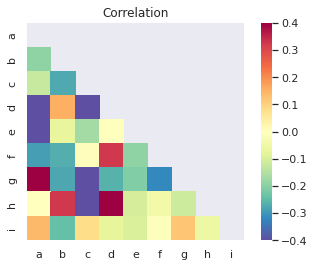

In [68]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
corrs = i.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation')

So we can conclude, All the features are normally distributed except for f, h, and i.

strongly positive correlation with

*   a & g
*   b & h
*   d & h
*   d & f 








#K-means clustering




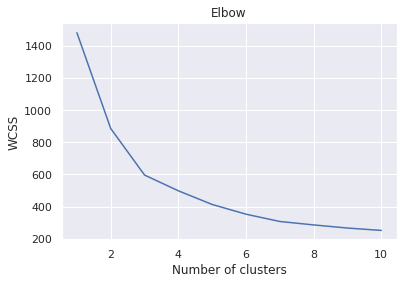

In [83]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
X = i.copy()
wcss = []
for j in range(1, 11):
    kmeans = KMeans(n_clusters=j, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow') # We will try Elbow method
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We should have 3 clusters due to above graph. Let's go Go for it!

In [84]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
pred_y

array([1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1,
       1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [85]:
len(pred_y)

214

In [86]:
i['predictions1'] = pd.DataFrame(pred_y)
i.head()

,a,b,c,d,e,f,g,h,i,predictions1,predictions2
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1,0
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,0
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1,0
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,1,0


In [87]:
i.head()

,a,b,c,d,e,f,g,h,i,predictions1,predictions2
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1,0
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,0
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1,0
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,1,0


In [88]:
i.predictions1.value_counts()

1    162
0     32
2     20
Name: predictions1, dtype: int64

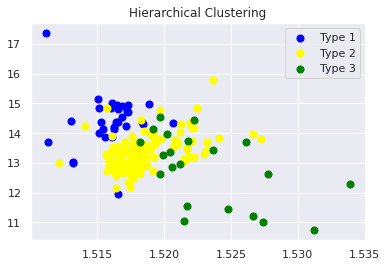

In [90]:
h = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = h.fit_predict(X)
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s = 50, c = 'blue', label = 'Type 1')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s = 50, c = 'yellow', label = 'Type 2')
plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s = 50, c = 'green', label = 'Type 3')
plt.title('Hierarchical Clustering')

plt.legend()
plt.show()

#Summary

**Please check the documentation** [here](https://docs.google.com/document/d/1UensMBB-UvfDT_5kMSoyp7Ei2O8j65actX6AbKSbU6s/edit?usp=sharing)